In [1]:
# Import required libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Predicted Clusters:
 [1 1 0 0 0 0]

Cluster Centers:
 [[182.5  74. ]
 [169.   58. ]]


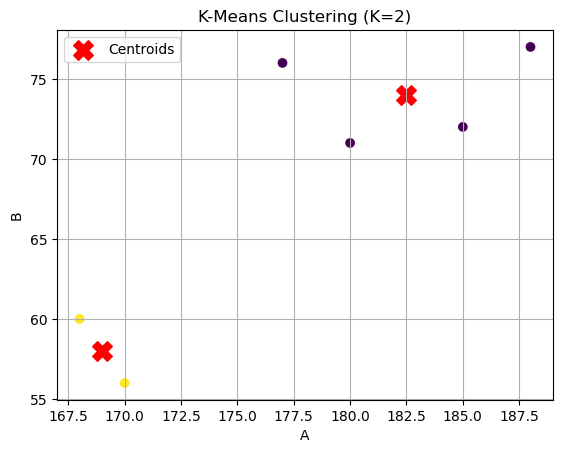

In [4]:
#Consider the dataset given below, implement K-Means Clustering algorithm using K=2. Find out new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster. Also find the accuracy of the model 

# Create dataset
data = {
    'A': [170, 168, 185, 188, 177, 180],
    'B': [56, 60, 72, 77, 76, 71]
}
df = pd.DataFrame(data)

# Apply K-Means Algorithm with 2 clusters
km = KMeans(n_clusters=2, random_state=0)

# Fit the dataset
y_predicted = km.fit_predict(df[['A', 'B']])

# Show assigned clusters
print("Predicted Clusters:\n", y_predicted)

# Add cluster column to dataframe
df['cluster'] = y_predicted

# Print cluster centers
print("\nCluster Centers:\n", km.cluster_centers_)

# Visualize clusters
plt.scatter(df['A'], df['B'], c=df['cluster'], cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering (K=2)')
plt.legend()
plt.grid(True)
plt.show()


Predicted Clusters:
 [2 1 1 ... 1 0 1]

Cluster Centers:
 [[0.4916992  0.00861279]
 [0.17220625 0.00399637]
 [0.4037491  1.        ]]


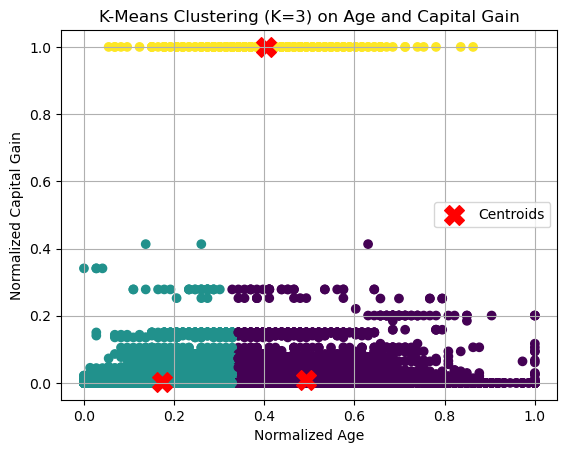

In [10]:
# Import required libraries

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")

# Select relevant columns
df_subset = df[['age', 'capital-gain']].copy()

# Normalize the features
scaler = MinMaxScaler()
df_subset[['age', 'capital-gain']] = scaler.fit_transform(df_subset[['age', 'capital-gain']])

# Apply KMeans clustering with 3 clusters
km = KMeans(n_clusters=3, random_state=0)
y_predicted = km.fit_predict(df_subset)

# Add cluster labels to the original dataframe
df['cluster'] = y_predicted

# Print predicted cluster assignments
print("Predicted Clusters:\n", y_predicted)

# Print the cluster centers
print("\nCluster Centers:\n", km.cluster_centers_)

# Visualize the clusters
plt.scatter(df_subset['age'], df_subset['capital-gain'], c=df['cluster'], cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Normalized Age')
plt.ylabel('Normalized Capital Gain')
plt.title('K-Means Clustering (K=3) on Age and Capital Gain')
plt.legend()
plt.grid(True)
plt.show()


[2 2 2 ... 4 1 4]
[[0.57788605 0.53278919 0.69038009]
 [0.74243839 0.03353954 0.42811033]
 [0.23479289 0.04660712 0.4286214 ]
 [0.23874745 0.04097479 0.82742686]
 [0.75818477 0.03118253 0.83252102]]


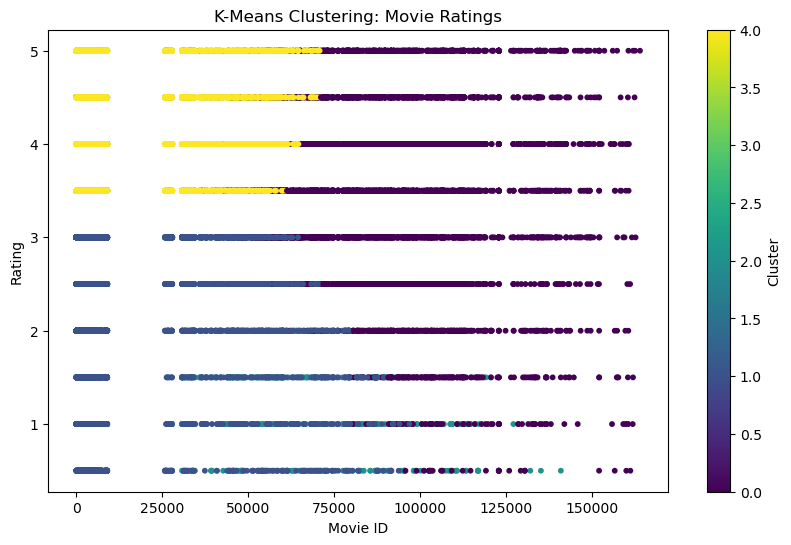

In [20]:
# Import the required libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the csv file and construct the data frame
df = pd.read_csv('ratings_small.csv')

# Select features
df_model = df[['userId', 'movieId', 'rating']]

# Perform preprocessing (scaling)
scaler = MinMaxScaler()
df_model_scaled = scaler.fit_transform(df_model)

# Apply K-Means Algorithm
km = KMeans(n_clusters=5, random_state=42)
y_predicted = km.fit_predict(df_model_scaled)

# Show the clusters assigned to each data point
print(y_predicted)

# Add these cluster assignments in the form of a new column ‘cluster’ to your dataframe
df['cluster'] = y_predicted

# In order to find out cluster centres
print(km.cluster_centers_)

# Scatter plot of movieId vs rating, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['movieId'], df['rating'], c=df['cluster'], cmap='viridis', s=10)
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.title('K-Means Clustering: Movie Ratings')
plt.colorbar(label='Cluster')

plt.show()
